In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import shapiro 
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Revisando data del csv "Calendar"

In [2]:
calendar=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\calendar.csv")
calendar.head()

C:\Users\mayin\AppData\Local\Temp\ipykernel_26856\49712091.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\calendar.csv")


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5269,2024-03-22,t,$185.00,NaN,4.0,1125.0
1,5269,2024-03-23,t,$185.00,NaN,4.0,1125.0
2,5269,2024-03-24,t,$185.00,NaN,4.0,1125.0
3,5269,2024-03-25,f,$185.00,NaN,5.0,1125.0
4,5269,2024-03-26,f,$185.00,NaN,5.0,1125.0


In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12426106 entries, 0 to 12426105
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 663.6+ MB


In [4]:
calendar.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,12426106.0,3.974338e+17,4.321736e+17,5269.0,33479300.0,53419568.0,8.150734e+17,1.117529e+18
minimum_nights,12426102.0,9.036971e+00,2.676659e+01,1.0,2.0,3.0,5.000000e+00,1.000000e+03
maximum_nights,12426102.0,1.721589e+06,6.076791e+07,1.0,100.0,365.0,1.125000e+03,2.147484e+09


Notas:
- Entender qué significa el código de la columna "listing_id"
- Se podría ver cómo fluctúa el precio en función de la fecha
- La fecha se podría cambiar de formato si fuera necesario
- Entender qué significa el valor de la columna "available"
- La columna precio es string, para poder sacar medias y trabajar mejor con ella, habría que quitarle el procentaje y convertirla a números decimales
- Ver utilidad de la columna adjusted price y el porcentaje de valores nulos. No olvidar que está expresado como objeto
- Se puede mostar mínimo, máximo y media de días de estancia 
- En la columna de noches máximas, identificar qué signigica que puedas quedarte 1125.0 y si  se trata solo de alquiler vacacional o también hay alquiler de vivienda
- Quizás se puede calcular lo que pueden ganar al año alquilando este tipo de alojamientos

In [5]:
calendar.isnull().sum()

listing_id               0
date                     0
available                0
price                    0
adjusted_price    12393621
minimum_nights           4
maximum_nights           4
dtype: int64

In [6]:
calendar.isnull().sum().sum()

12393629

In [7]:
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)
stat, p = shapiro(calendar["price"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

C:\Users\mayin\AppData\Local\Temp\ipykernel_26856\810469304.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)


stat=0.237, p=0.000
No sigue una distribución Gaussiana


C:\Users\mayin\AppData\Local\Temp\ipykernel_26856\810469304.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12426106.
  stat, p = shapiro(calendar["price"])


C:\Users\mayin\AppData\Local\Temp\ipykernel_26856\1078176311.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = calendar.corr().round(2)


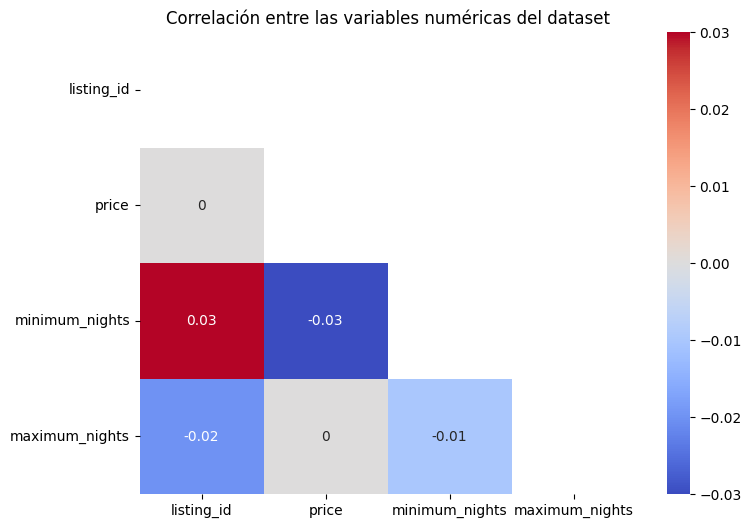

In [8]:
plt.figure(figsize=(8,6))
correlation_matrix = calendar.corr().round(2)
mask = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
heatmap = sns.heatmap(mask, annot=True, cmap="coolwarm")
heatmap.set_title("Correlación entre las variables numéricas del dataset")
plt.show()

In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12426106 entries, 0 to 12426105
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 663.6+ MB


## 2. Revisando data del csv "listings complet"

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
complete_listing=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\listings complet.csv")

In [12]:
complete_listing.drop_duplicates()
complete_listing.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,34421962,https://www.airbnb.com/rooms/34421962,20240322023526,2024-03-22,city scrape,Waipouli Beach Resort E106,"Beautiful Luxury Inner Courtyard Garden View, ...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,34386367,https://www.airbnb.com/users/show/34386367,Kauai Calls!,2015-05-27,"Hawaii, United States",I have always known I would have a home on bea...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/34386367/prof...,https://a0.muscache.com/im/users/34386367/prof...,Kauaʻi,47.0,106.0,"['email', 'phone']",t,t,NaN,Kapaa-Wailua,Kauai,22.062280,-159.319180,Entire condo,Entire home/apt,4,2.0,2 baths,1.0,2.0,"[""Air conditioning"", ""Hot tub"", ""Coffee maker""...",$417.00,1,1125,1.0,7.0,3.0,1125.0,2.4,355.3,NaN,t,9,16,23,243,2024-03-22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430080010111,t,41,41,0,0,NaN
1,40707945,https://www.airbnb.com/rooms/40707945,20240322023526,2024-03-23,city scrape,DO NOT PUBLISH BEFORE MERGING 14891-HROV,This is the description of this beautiful hote...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,182704096,https://www.airbnb.com/users/show/182704096,Aston Waikiki Beach Hotel,2018-04-05,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/b1c63...,https://a0.muscache.com/im/pictures/user/b1c63...,Waikiki,9.0,20.0,['phone'],t,t,NaN,Primary Urban Center,Honolulu,21.272438,-157.822556,Room in hotel,Private room,1,1.5,1.5 baths,1.0,0.0,"[""Elevator"", ""Baby bath"", ""Baby monitor"", ""Air...",$290.00,1,28,1.0,1.0,731.0,731.0,1.0,731.0,NaN,t,30,60,90,365,2024-03-23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,9,0,9,0,NaN


In [13]:
complete_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34049 entries, 0 to 34048
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            34049 non-null  int64  
 1   listing_url                                   34049 non-null  object 
 2   scrape_id                                     34049 non-null  int64  
 3   last_scraped                                  34049 non-null  object 
 4   source                                        34049 non-null  object 
 5   name                                          34049 non-null  object 
 6   description                                   32760 non-null  object 
 7   neighborhood_overview                         18237 non-null  object 
 8   picture_url                                   34049 non-null  object 
 9   host_id                                       34049 non-null 

In [14]:
complete_listing["host_is_superhost"].unique()

array(['f', 't', nan], dtype=object)

In [15]:
complete_listing.isnull().sum().sum()

195307

In [16]:
((complete_listing.isnull().sum().sum())*100/(34049*75)).round(2)

7.65

In [17]:
(complete_listing.isnull().sum()/len(complete_listing)*100).round()

id                                               0.0
listing_url                                      0.0
scrape_id                                        0.0
last_scraped                                     0.0
source                                           0.0
                                                ... 
calculated_host_listings_count                   0.0
calculated_host_listings_count_entire_homes      0.0
calculated_host_listings_count_private_rooms     0.0
calculated_host_listings_count_shared_rooms      0.0
reviews_per_month                               23.0
Length: 75, dtype: float64

In [18]:
complete_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Notas:
- Posibles columnas útiles: host name, host since, host location, ¿host is superhost?, host neighbourhood, accommodates (capacidad), 	bathrooms	bathrooms_text	bedrooms	beds	amenities	price	minimum_nights	maximum_nights has_availability	availability_30	availability_60	availability_90	availability_365 number_of_reviews	number_of_reviews_ltm	number_of_reviews_l30d	first_review	last_review	review_scores_rating license	
- Latitud, longitud
- room type para saber si es alojamiento entero o habitaciones

## 3. Revisando data del csv "listings"

In [19]:
listing=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\listings.csv")

In [20]:
listing.drop_duplicates()
listing.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,34421962,Waipouli Beach Resort E106,34386367,Kauai Calls!,Kauai,Kapaa-Wailua,22.062280,-159.319180,Entire home/apt,417.0,1,0,NaN,NaN,41,243,0,430080010111
1,40707945,DO NOT PUBLISH BEFORE MERGING 14891-HROV,182704096,Aston Waikiki Beach Hotel,Honolulu,Primary Urban Center,21.272438,-157.822556,Private room,290.0,1,0,NaN,NaN,9,365,0,NaN
2,43656551,"Ilikai 1212 Ocean / Lagoon / King Bed, Sofa Bed",347952914,Hawaii Vacation,Honolulu,Primary Urban Center,21.284374,-157.838440,Entire home/apt,199.0,1,52,2024-02-20,1.51,79,145,13,Exempt


In [21]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34049 entries, 0 to 34048
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34049 non-null  int64  
 1   name                            34049 non-null  object 
 2   host_id                         34049 non-null  int64  
 3   host_name                       34047 non-null  object 
 4   neighbourhood_group             34049 non-null  object 
 5   neighbourhood                   34049 non-null  object 
 6   latitude                        34049 non-null  float64
 7   longitude                       34049 non-null  float64
 8   room_type                       34049 non-null  object 
 9   price                           30985 non-null  float64
 10  minimum_nights                  34049 non-null  int64  
 11  number_of_reviews               34049 non-null  int64  
 12  last_review                     

In [22]:
(listing.isnull().sum()/len(listing)*100).round()

id                                 0.0
name                               0.0
host_id                            0.0
host_name                          0.0
neighbourhood_group                0.0
neighbourhood                      0.0
latitude                           0.0
longitude                          0.0
room_type                          0.0
price                              9.0
minimum_nights                     0.0
number_of_reviews                  0.0
last_review                       23.0
reviews_per_month                 23.0
calculated_host_listings_count     0.0
availability_365                   0.0
number_of_reviews_ltm              0.0
license                           18.0
dtype: float64

In [23]:
listing.isnull().sum().sum()

25031

In [24]:
((listing.isnull().sum().sum())*100/(34049*19)).round(2)

3.87

Notas:
- Este csv tiene menos información, pero es útil
- Tal vez podemos añadir a este alguna de la información del anterior o hacer más pequeño el anterior para facilitar el trabajo


## 4. Revisando data del csv "neighbourhoods"

In [25]:
neighbourhoods=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\neighbourhoods.csv")

In [26]:
neighbourhoods.drop_duplicates()
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,Hawaii,Hamakua
1,Hawaii,Kau
2,Hawaii,North Hilo
3,Hawaii,North Kohala
4,Hawaii,North Kona


In [27]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  32 non-null     object
 1   neighbourhood        32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [28]:
neighbourhoods.isnull().sum().sum()

0

Notas:
- A priori es útil, pero no estoy segura de que sirva para mucho (excepto informativo), teniendo info parecida y la posición geográfica en el cvs listing complet

## 5. Revisando data del geojson "neighbourhoods"

In [29]:
neighbourhoodsjson=pd.read_json(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\neighbourhoods.geojson")
neighbourhoodsjson.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [30]:
neighbourhoodsjson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      34 non-null     object
 1   features  34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes


Nota:
- Este archivo contiene datos geográficos de los alojamientos (latitud y lingitud) ya contenidos en el archivo listings complet. 
- La consulta en JSON Formatter & Validator arroja esta info:   
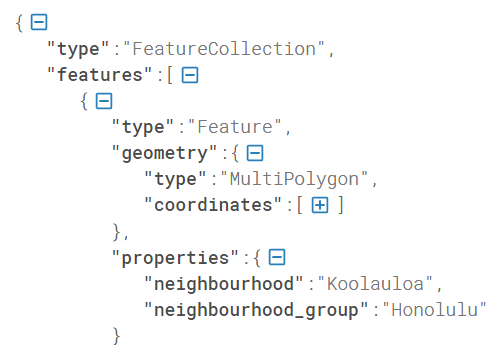  

- Además de longitud y latitud, el archivo contiene el nombre del "neighbourhood" y del "neighbourhood_group". Esta información están tanto en el csv de neighbourhoods como en el de listings. 

## 6. Revisando data del csv "reviews_complet"

In [31]:
complete_reviews=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\reviews_complet.csv")

In [32]:
complete_reviews.drop_duplicates()
complete_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5269,289800,2011-05-31,452192,Gert,Very warm welcome. Great place to stay. Highl...
1,5269,742885,2011-11-25,1135109,Lene,Barrie was very kind and sweet but it could no...
2,5269,494178707,2019-07-23,131185347,Kathleen,"Great place, location & wonderful hostess. Tha..."
3,5269,523932651,2019-09-04,5708075,Martha,This is such a charming and cozy place to stay...
4,5269,536049410,2019-09-25,85727419,Brent,Cute little place with easy access to Waimea a...


In [33]:
complete_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195681 entries, 0 to 1195680
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1195681 non-null  int64 
 1   id             1195681 non-null  int64 
 2   date           1195681 non-null  object
 3   reviewer_id    1195681 non-null  int64 
 4   reviewer_name  1195681 non-null  object
 5   comments       1195471 non-null  object
dtypes: int64(3), object(3)
memory usage: 54.7+ MB


In [34]:
complete_reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         210
dtype: int64

In [35]:
complete_reviews.isnull().sum().sum()

210

In [36]:
(complete_reviews.isnull().sum()/len(complete_reviews)*100).round(3)

listing_id       0.000
id               0.000
date             0.000
reviewer_id      0.000
reviewer_name    0.000
comments         0.018
dtype: float64

Nota:
- No hay scores, solo si exite una review para un alojamiento, la fehca en que se hizo, quién lo rellenó y, en la mayoría de los casos, el comentario

## 7. Revisando data del csv "reviews"

In [37]:
reviews=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Data\reviews.csv")

In [38]:
reviews.drop_duplicates()
reviews.head()

,listing_id,date
0,5269,2011-05-31
1,5269,2011-11-25
2,5269,2019-07-23
3,5269,2019-09-04
4,5269,2019-09-25


In [39]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195681 entries, 0 to 1195680
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1195681 non-null  int64 
 1   date        1195681 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.2+ MB


In [40]:
reviews.isnull().sum()

listing_id    0
date          0
dtype: int64

Nota: 
- La información de este csv ya está contenida en el anterior

# Conclusiones

- El archivo complete_listing es el que tiene prácticamente toda la información, pero en algunos casos, las columnas están incompletas.
- Algunas de las columnas se puede rellenar usando el contenido de otros archivos.
- Trabajaré con complete_listings como base y a partir de ahí eliminaré, repararé, rellenaré y haré los cálculos necesarios.